# Exploratory Data Analysis on COVID-19 Data


In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [3]:
covid_data = pd.read_csv('covid_19_data.csv')
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [13]:
covid_data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [12]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [14]:
covid_data['ObservationDate'] = pd.to_datetime(covid_data['ObservationDate'])

covid_data.fillna({'Confirmed': 0, 'Deaths': 0, 'Recovered': 0}, inplace=True)

covid_data.drop('SNo', axis=1, inplace=True)

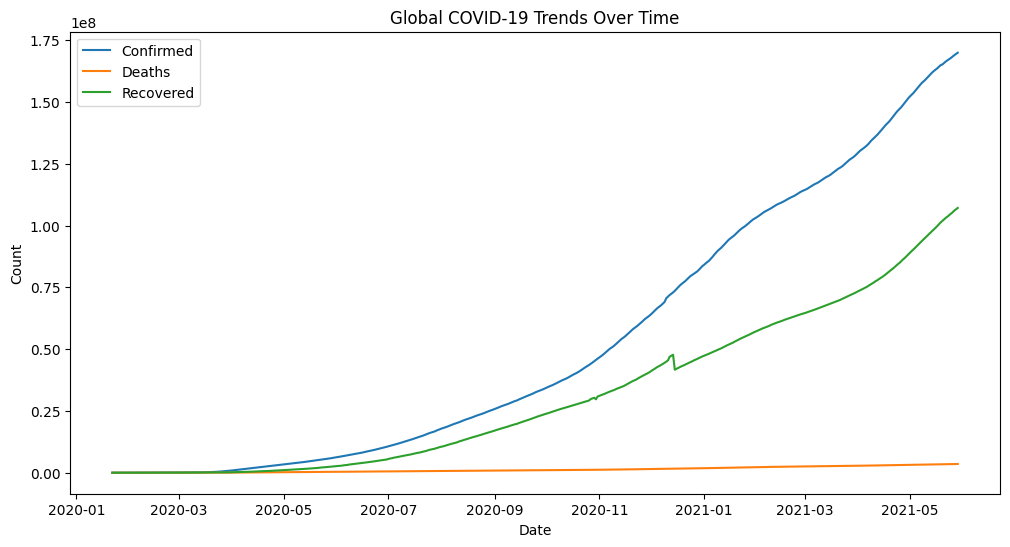

In [15]:
#Visualize the growth of confirmed cases, deaths and recoveries globally
global_trend = covid_data.groupby('ObservationDate').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=global_trend, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=global_trend, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=global_trend, x='ObservationDate', y='Recovered', label='Recovered')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

C:\Users\Phophi\AppData\Local\Temp\ipykernel_16644\2981089882.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Confirmed', y='Country/Region', palette='viridis')


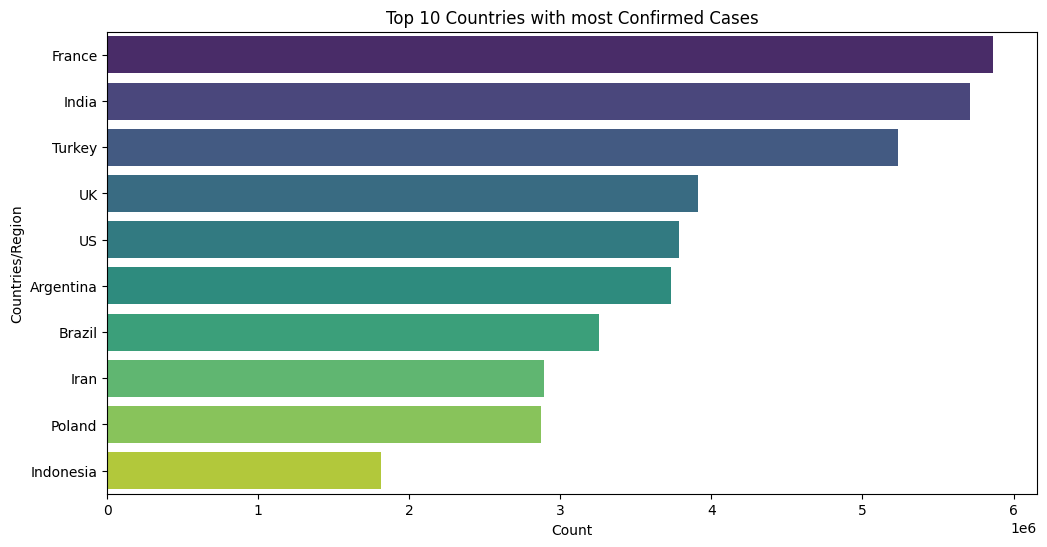

In [18]:
#Compare top 10 countries by confirmed cases
lastest_data = covid_data.groupby('Country/Region').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max'
}).reset_index()

top10 = lastest_data.sort_values('Confirmed', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Confirmed', y='Country/Region', palette='viridis')
plt.title('Top 10 Countries with most Confirmed Cases')
plt.xlabel('Count')
plt.ylabel('Countries/Region')
plt.show()

C:\Users\Phophi\AppData\Local\Temp\ipykernel_16644\210453469.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Mortality Rate (%)', y='Country/Region', palette='rocket')


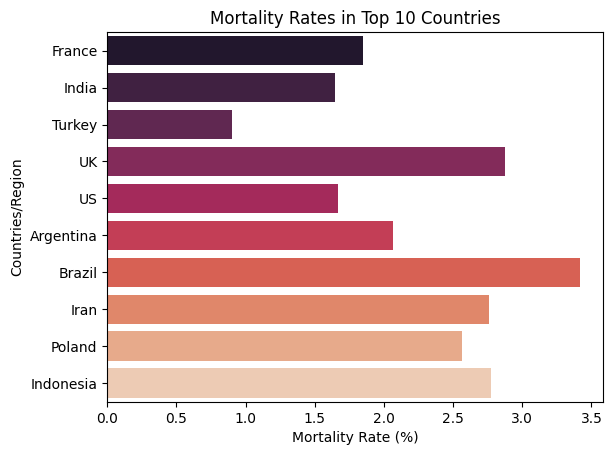

In [28]:
#Calculate death and recovery rates for insights
lastest_data['Mortality Rate (%)'] = (lastest_data['Deaths']/lastest_data['Confirmed']) * 100
lastest_data['Recovery Rate (%)'] = (lastest_data['Recovered']/lastest_data['Confirmed']) * 100

lastest_data.replace([np.inf, -np.inf], np.nan, inplace=True)
lastest_data.fillna(0, inplace=True)

top10 = lastest_data.sort_values('Confirmed', ascending=False).head(10)

plt.Figure(figsize=(12, 6))
sns.barplot(data=top10, x='Mortality Rate (%)', y='Country/Region', palette='rocket')
plt.title('Mortality Rates in Top 10 Countries')
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Countries/Region')
plt.show()



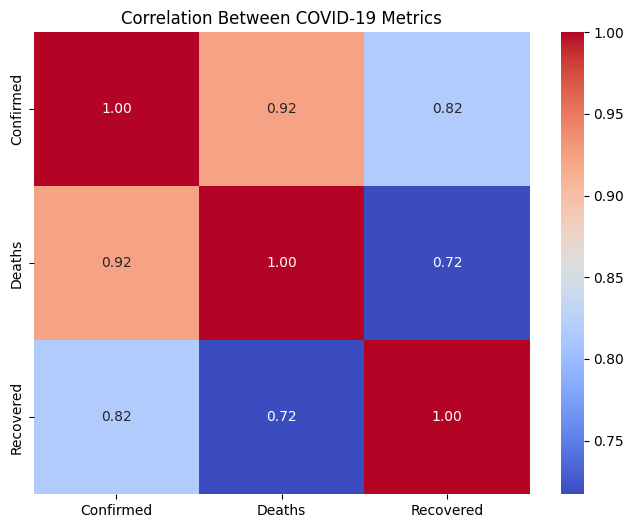

In [33]:
#Explore correlations between metrics
corr = lastest_data[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between COVID-19 Metrics')
plt.show()